# Data analysis
The "Data analysis" file conducts an analysis of data related to the risk of heart disease. It utilizes the pandas, seaborn, and matplotlib libraries for data loading, visualization, and statistical computations. The analysis also involves importing libraries, loading the data, generating histograms for patient age, creating bar charts depicting the number of males and females, constructing box plots for blood pressure and cholesterol levels, and performing correlation analysis between variables. The file provides significant insights into the risk of heart disease based on data analysis, enabling a better understanding of the issue and facilitating further actions in the field of cardiovascular medicine and prevention. The key findings from the analysis are as follows:
- The average age of patients is approximately 54.5 years
- Males constitute around 68% of the examined group
- Patients with asymptomatic chest pain have a higher risk of heart disease
- The percentage of individuals with heart disease is higher among males (55.72%) compared to females (26.04%)

### Required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

### Loading data

In [2]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


Attribute Information:
1. age: age in years
2. sex: gender (0 = female; 1 = male)
3. cp: type of chest pain (1 = typical angina; 2 = atypical angina; 3 = non-angina pain; 4 = asymptomatic)
4. trestbps: resting blood pressure (in mm Hg at hospital admission)
5. chol: serum cholesterol level (in mg/dl)
6. fbs: fasting blood sugar level > 120 mg/dl (0 = false; 1 = true)
7. restecg: resting electrocardiography results (0: normal; 1: presence of ST-T wave deviation; 2: probable or definite left ventricular hypertrophy according to Estes criteria)
8. thalach: maximum achieved heart rate
9. exang: exertion-induced angina (0 = no; 1 = yes)
10. oldpeak: ST-segment decline induced by exercise relative to rest
11. slope: slope of peak ST segment during exercise (1: rising; 2: flat; 3: falling)
12. ca: number of major vessels (0-3) stained on fluoroscopy
13. thal: 3 = normal; 6 = established defect; 7 = reversible defect
14. decision: diagnosis of heart disease (0: no risk <50%; 1: risk exists >50%)

### Data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  decision  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


The data set has 297 rows and 14 columns. The object "data" is of type DataFrame, belonging to the pandas module in Python. The data types of the columns are mostly float64, except for the decision column which is of type int64. The DataFrame occupies approximately 32.6 KB of memory.

### Descriptive statistics for each column

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


The data.describe() function provides a statistical summary for each column in the DataFrame named "data." The summary includes information such as the number of values (count), mean, standard deviation (std), minimum value (min), quartiles (25%, 50%, 75%), and maximum value (max).
Analyzing the statistical summary, we can draw some interesting conclusions:
- The average age of patients is about 54.5 years, with the youngest person being 29 years old and the oldest 77 years old.
- About 68% of patients are male (the average value of the "sex" column is 0.677).
- The mean value of blood pressure at rest (trestbps) is 131.7.
- The mean value of cholesterol (chol) is 247.4.
- About 14% of patients have elevated fasting blood sugar (fbs).
- The average maximum achieved heart rate (thalach) is 149.6 in patients.
- About 33% of patients have exercise-induced angina pectoris (exang).
- The mean values of ST-segment depression (oldpeak) are 1.056.
- The mean values of ST-segment slope (slope) are 1.603.
- About 46% of patients were diagnosed with heart disease (the mean value of the "decision" column is 0.461).

### Age histogram

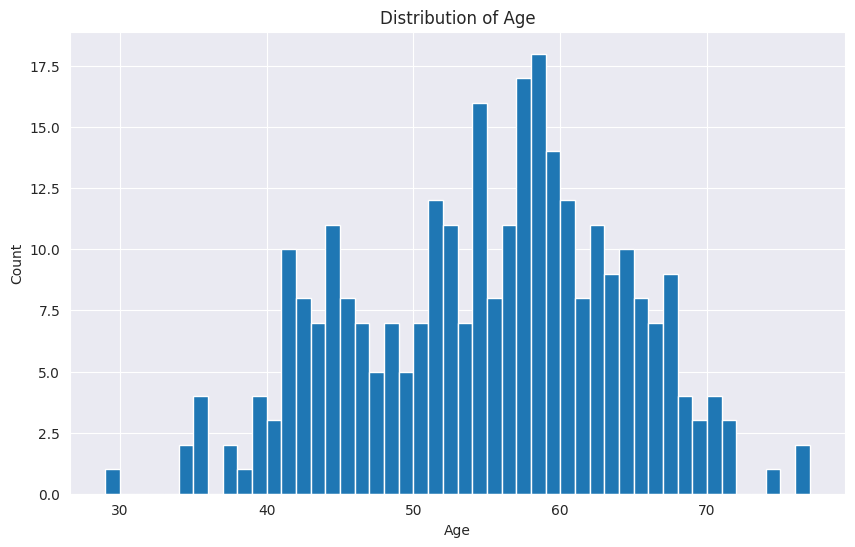

In [5]:
age_range = data['age'].max() - data['age'].min()

plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=int(age_range))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

The vast majority of patients are between the ages of 40 and 70.

### Gender bar chart

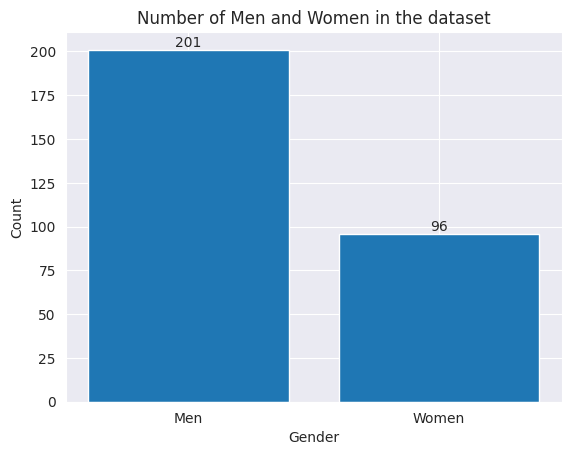

In [6]:
gender_counts = data['sex'].value_counts()  # Number of men and women in the dataset

plt.bar(['Men', 'Women'], gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Men and Women in the dataset')
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [7]:
total_count = len(data)
heart_disease_counts = data[data['decision'] == 1]['sex'].value_counts()

percent_male_with_heart_disease = (heart_disease_counts[1] / gender_counts[1]) * 100
percent_female_with_heart_disease = (heart_disease_counts[0] / gender_counts[0]) * 100

print('Percentage of individuals with heart disease:')
print('Men: ', round(percent_male_with_heart_disease, 2))
print('Women:', round(percent_female_with_heart_disease, 2))

Percentage of individuals with heart disease:
Men:  55.72
Women: 26.04


The analysis shows that the percentage of people with heart disease is higher among men than among women. This suggests that men may have a higher risk or susceptibility to heart disease compared to women. On the one hand, this highlights the importance of considering gender as a factor in assessing the risk and incidence of heart disease. On the other hand, there is not enough data to assess the credibility of these initial conclusions. The dataset consists of only a few hundred records.

### Chest paint type charts

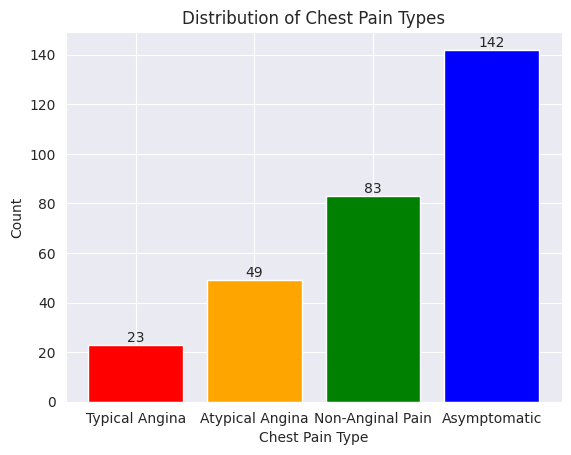

In [8]:
cp_counts = data['cp'].value_counts()
colors = ['blue', 'green', 'orange', 'red']

plt.bar(cp_counts.index, cp_counts.values, color=colors)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.xticks(range(1, 5), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
for i, count in enumerate(cp_counts.values):
    plt.annotate(str(count), xy=(cp_counts.index[i], count), ha='center', va='bottom')
plt.show()

### Relationship between Chest Pain Type and Heart Disease Diagnosis

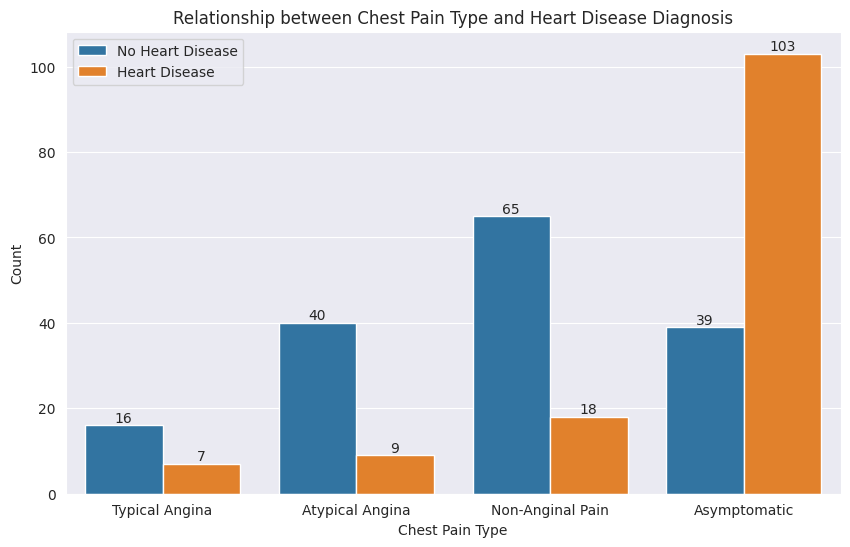

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cp', hue='decision', data=data)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Relationship between Chest Pain Type and Heart Disease Diagnosis')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(range(0, 4), ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()

The relationship between chest pain type and heart disease diagnosis reveals that in the group of individuals experiencing "Asymptomatic" (asymptomatic chest pain), there is a significant difference in the number of individuals without heart disease compared to those with heart disease. This appears to be an incredibly high percentage, and there may be various factors that can explain it:
- Asymptomatic individuals may carry hidden risk factors such as hypertension, high cholesterol levels, smoking, or obesity.
- In the analyzed small dataset, there may be a specific subgroup of individuals who are prone to heart disease.
- There could be a statistical error in such a small dataset. Especially when the numbers are small, the results may be more susceptible to random fluctuations.

It is important to emphasize that the analysis based on a small dataset may be limited, and it is not possible to definitively conclude that asymptomatic individuals have such a high risk of heart disease based on these findings.

In [10]:
cp_counts = data.groupby(['cp', 'decision']).size().unstack(fill_value=0)
cp_types = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']

for i, cp_type in enumerate(cp_types):
    count_no_hd = cp_counts.loc[i+1, 0]
    count_hd = cp_counts.loc[i+1, 1]
    count_hd_percent = round((count_hd / (count_hd + count_no_hd))*100, 2)
    print("Count of {}:\n     No Heart Disease = {},\n     Heart Disease = {},\n     Heart Disease in percent = {}%".format(cp_type, count_no_hd, count_hd, count_hd_percent))

Count of Typical Angina:
     No Heart Disease = 16,
     Heart Disease = 7,
     Heart Disease in percent = 30.43%
Count of Atypical Angina:
     No Heart Disease = 40,
     Heart Disease = 9,
     Heart Disease in percent = 18.37%
Count of Non-Anginal Pain:
     No Heart Disease = 65,
     Heart Disease = 18,
     Heart Disease in percent = 21.69%
Count of Asymptomatic:
     No Heart Disease = 39,
     Heart Disease = 103,
     Heart Disease in percent = 72.54%


We can observe that the highest percentage of individuals with heart disease is found in the case of typical chest pain (Typical Angina). This suggests that this type of pain may be more strongly associated with the risk of heart disease compared to other types of pain. However, in data analysis, it is important to exercise caution when drawing definitive conclusions, as these results may be influenced by various factors and limitations of the dataset.

### Boxplot of blood pressure distribution

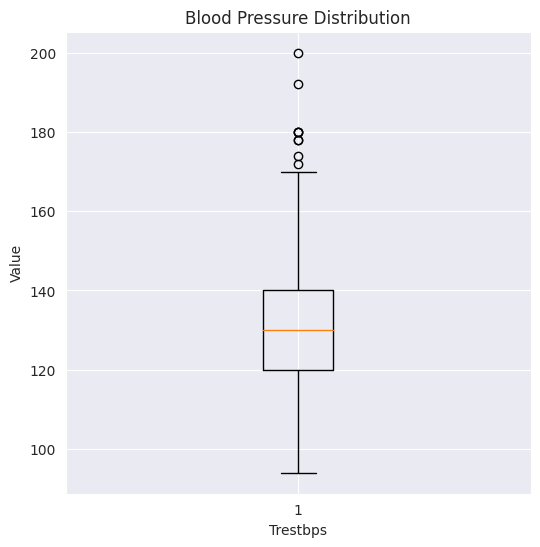

In [11]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['trestbps'])
plt.xlabel('Trestbps')
plt.ylabel('Value')
plt.title('Blood Pressure Distribution')
plt.show()

### Boxplot of cholesterol level distribution

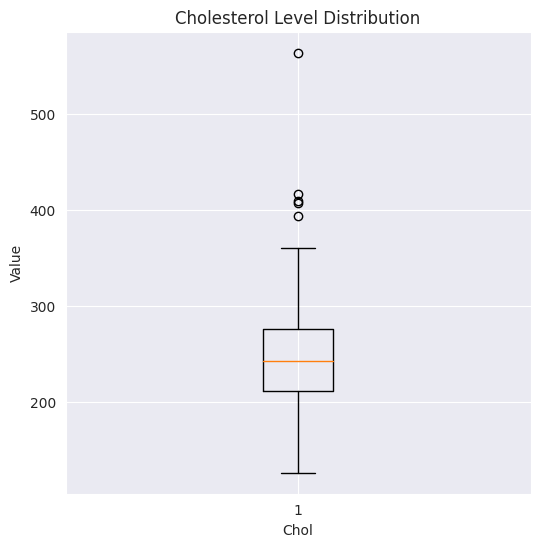

In [12]:
plt.figure(figsize=(6, 6))
plt.boxplot(data['chol'])
plt.xlabel('Chol')
plt.ylabel('Value')
plt.title('Cholesterol Level Distribution')
plt.show()

### Single correlation between blood pressure and cholesterol levels

In [13]:
correlation = data['trestbps'].corr(data['chol'])
print("Correlation between blood pressure and cholesterol level: {:.2f}".format(correlation))

Correlation between blood pressure and cholesterol level: 0.13


The correlation coefficient between blood pressure (trestbps) and cholesterol level (chol) is 0.13. This indicates a weak positive correlation between these two variables. However, it is important to note that correlation alone does not imply causation. Other factors and variables may also influence the relationship between blood pressure and cholesterol levels.

### Heatmap of correlation
Correlation between variables is useful for identifying relationships and patterns, selecting relevant variables, predicting outcomes, and studying the influence of variables on each other. It can also aid in eliminating excessively correlated variables.

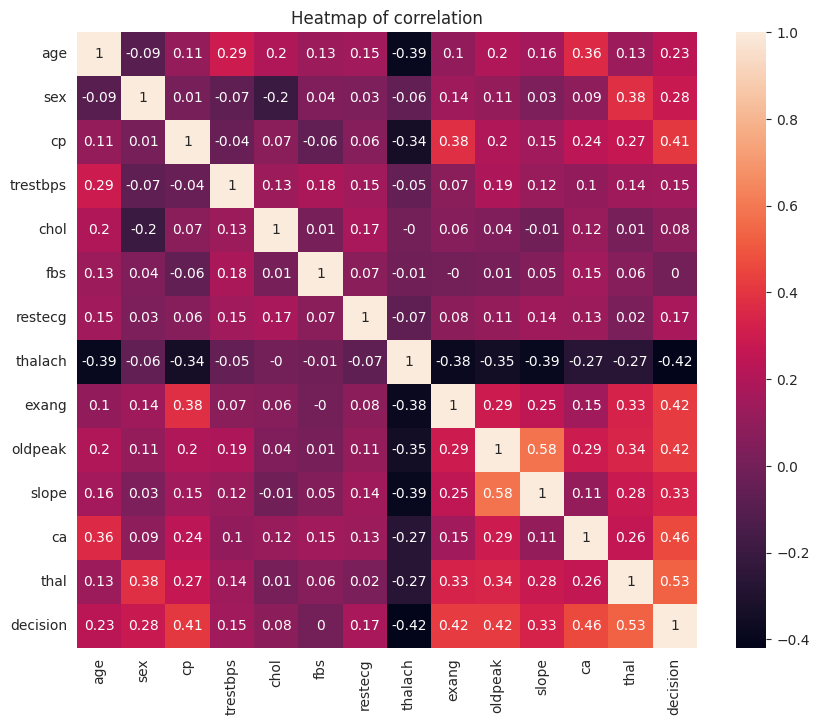

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(2), annot=True)
plt.title('Heatmap of correlation')
plt.show()

Age (age), Sex (gender), Chest pain type (cp), Maximum heart rate achieved (thalach), Exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), Slope of the ST segment during exercise (slope), Number of major vessels colored by fluoroscopy (ca), and Thalium stress test result (thal) may influence the decision regarding the presence of heart disease.

### Correlation with decision

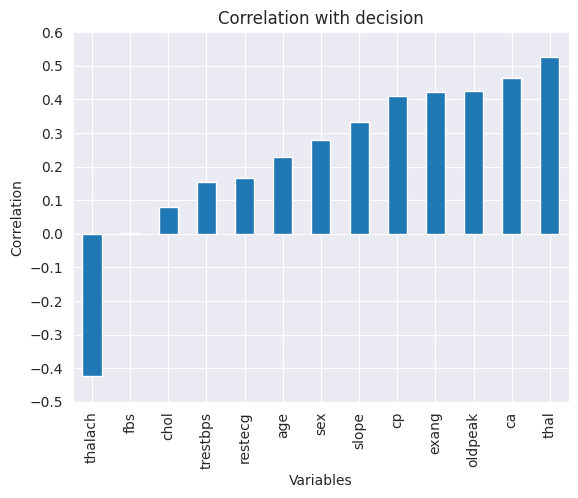

In [15]:
correlation = data.corr()['decision']
correlation = correlation.drop('decision')
correlation = correlation.sort_values()
correlation.plot(kind='bar')

plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation with decision')
plt.xticks(rotation=90)
plt.yticks([i / 10 for i in range(-5, 7)])
plt.show()

### Boxplot for all attributes

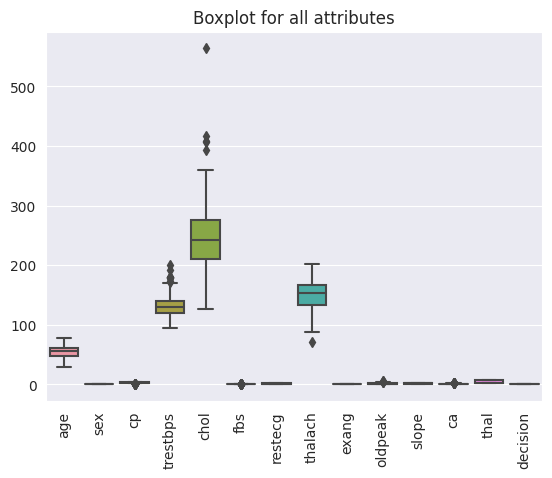

In [16]:
sns.boxplot(data=data)
plt.title('Boxplot for all attributes')
plt.xticks(rotation=90)
plt.show()

### Dendogram

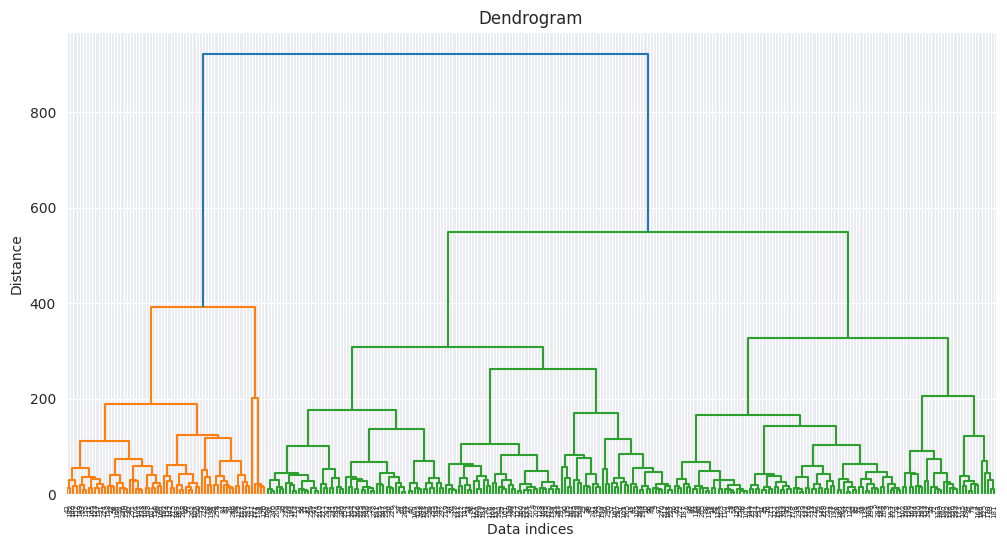

In [17]:
dist_matrix = linkage(data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(dist_matrix)
plt.title('Dendrogram')
plt.xlabel('Data indices')
plt.ylabel('Distance')
plt.show()

### PCA

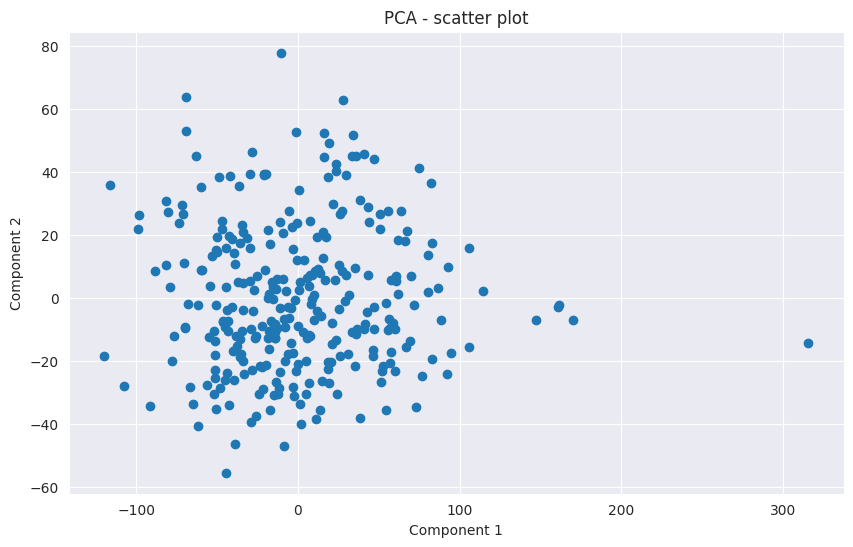

In [18]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

x = data_pca[:, 0]
y = data_pca[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA - scatter plot')
plt.show()